The n-queens puzzle is the problem of placing n queens on an n x n chessboard such that no two queens attack each other.

Given an integer n, return all distinct solutions to the n-queens puzzle. You may return the answer in any order.

Each solution contains a distinct board configuration of the n-queens' placement, where 'Q' and '.' both indicate a queen and an empty space, respectively.

 

Example 1:

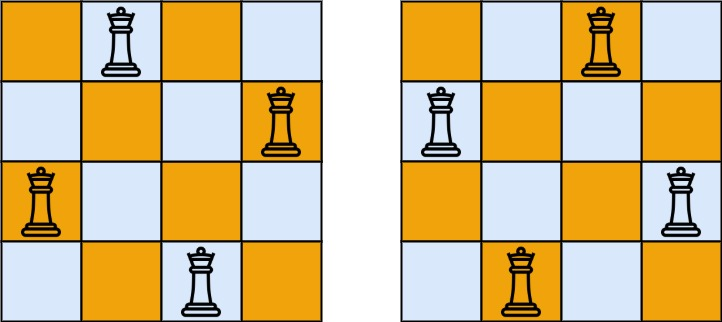

Input: n = 4
Output: [[".Q..","...Q","Q...","..Q."],["..Q.","Q...","...Q",".Q.."]]
Explanation: There exist two distinct solutions to the 4-queens puzzle as shown above

Example 2:

Input: n = 1
Output: [["Q"]]

 

Constraints:

    1 <= n <= 9



A queen blocks an entire row, so there can be at most one queen per row. We will backtrack based on the possible position of a queen in each row.

We will keep track of the board with an array of integers board of size n. board[i] = 0 if there are no queens at row i, and board[i] = j if the queen in row i is in column j (1-indexed columns).

Given a board state, we identify the available squares with the aid of three integers: columns (n bits), downDiagonals (2n - 1 bits), and upDiagonlas (2n - 1 bits).

    columns & 1 << j - 1 == 1 iff there is a queen at column j
    downDiagonals & 1 << i - j + n iff there is a queeen at the diagonal given by y = x + b where b = j - i
    upDiagonals & 1 << i + j - 1 == 1 iff there is a queen at the diagonal given by y = -x + b where b = i + j + 1

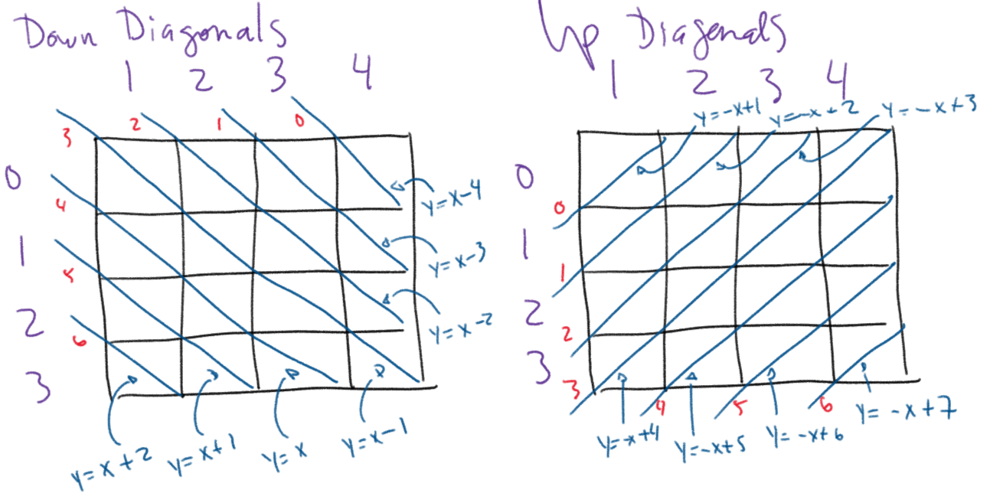

In [ ]:
class Solution:
    def availableSquares(self, board: List[int], row: int):
        n = len(board)
        columns, downDiagonals, upDiagonals = 0, 0, 0
        
        for i, j in enumerate(board):
            # there is a queen at j in row i
            if j != 0:
                columns |= 1 << j - 1
                downDiagonals |= 1 << i - j + n
                upDiagonals |= 1 << i + j - 1
        
        for j in range(n):
            # if square j in row is not blocked
            if columns & 1 << j == 0 and downDiagonals & 1 << (row - j + n - 1) == 0 and upDiagonals & 1 << (row + j) == 0:
                yield j + 1
    
    def backtrack(self, board: List[int], k: int = 0,):
        n = len(board)
        if k == n:
            # we've successfully placed n queens on the board, append board to solutions
            self.solutions.append(["".join("Q" if i == rowQ else "." for i in range(1, n + 1)) for rowQ in board])
        else:
            # for each available square in row k
            for j in self.availableSquares(board, k):
                board[k] = j                  # add queen at position j in row k
                self.backtrack(board, k + 1)  # move on to the next row
                board[k] = 0                  # remove queen from row k
    
    def solveNQueens(self, n: int) -> List[List[str]]:
        self.solutions = []
        self.backtrack([0 for _ in range(n)])
        return self.solutions